<a href="https://colab.research.google.com/github/rms5010/first-dl-project/blob/main/EDA_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 라이브러리 불러오기

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import json
import re
from collections import Counter

# 데이터 불러오기

In [119]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/2025-1/dl/deep-learning-project/KR_youtube_trending_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 날짜 컬럼 전처리

In [120]:
print(df.columns.tolist())

['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description']


In [121]:
# 1. 컬럼 이름 정리
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# 2. 날짜 컬럼 변환
df['publishedat'] = pd.to_datetime(df['publishedat'], errors='coerce')

# 3. 컬럼 목록 출력 확인
print(df.columns)

Index(['video_id', 'title', 'publishedat', 'channelid', 'channeltitle',
       'categoryid', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')


# 최근 일주일 기준 영상 추출

In [122]:
recent = df[df['publishedat'] >= df['publishedat'].max() - pd.Timedelta(days=7)]
top_recent = recent.sort_values(by='view_count', ascending=False).drop_duplicates('video_id').head(20)

# 조회수 상위 영상 출력

In [123]:
top_recent[['title', 'channeltitle', 'view_count', 'publishedat']]

,title,channeltitle,view_count,publishedat
265631,온앤오프(ONF) 'Bye My Monster' MV,ONF OFFICIAL,10281766,2024-04-08 09:00:02+00:00
265575,[4K] BABYMONSTER “SHEESH” Band LIVE Concert 세상...,it's Live,5089667,2024-04-11 08:00:08+00:00
265626,'HOT DEBUT' BABYMONSTER - SHEESH #엠카운트다운 EP.83...,Mnet K-POP,3282168,2024-04-11 11:09:11+00:00
265566,불침번,숏박스,2724661,2024-04-12 09:00:48+00:00
265615,2m넘는 외국인 운동선수와의 5대1 대결🔥 수원 왕갈비 대결먹방,tzuyang쯔양,2563628,2024-04-09 12:00:34+00:00
265557,구구즈다시보니까 넘좋지않아여? 너무좋져? | 👅나영석의 와글와글,채널십오야,2135951,2024-04-12 09:00:41+00:00
265619,'결승골 도움' 손흥민… 토트넘 '4위 탈환' #SPOTIME,스포타임,2090981,2024-04-07 20:03:00+00:00
265599,"'6골 난타전' 레알-맨시티, 역대급 미친 명승부 #SPOTIME",스포타임,1863574,2024-04-09 22:30:00+00:00
265556,[EN] 본때는 핑계고 ㅣ EP.42,뜬뜬 DdeunDdeun,1855063,2024-04-12 23:58:06+00:00
265606,[조커: 폴리 아 되] 1차예고편,Warner Bros. Korea,1840673,2024-04-10 00:53:22+00:00


# 워드클라우드 생성 (제목 기준)

In [124]:
# 나눔고딕 폰트 설치 (한글 지원용)
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm

# 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50892 (\N{HANGUL SYLLABLE WEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

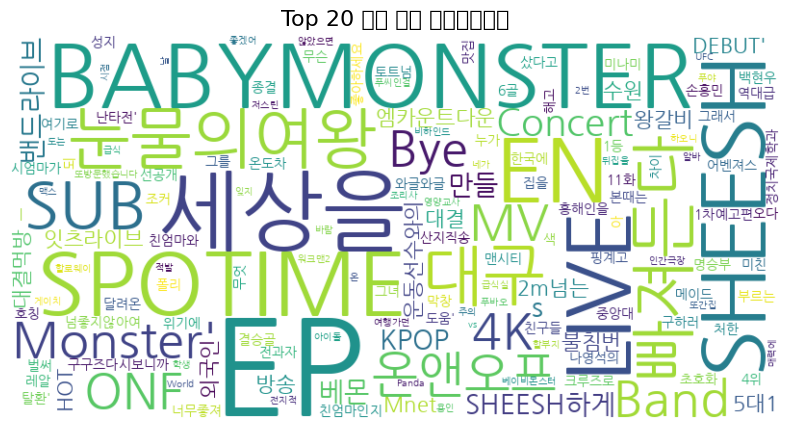

In [125]:
# 제목 기반 워드클라우드 생성
text = " ".join(top_recent['title'].dropna())

wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    font_path=font_path
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Top 20 영상 제목 워드클라우드", fontsize=16)
plt.show()

# 카테고리 매핑 (category_id → 카테고리명)

In [126]:
# 업로드한 kr_category_id.json 파일 읽기
import json

with open('/content/drive/MyDrive/2025-1/dl/deep-learning-project/KR_category_id.json', 'r', encoding='utf-8') as f:
    cats = json.load(f)

# category_id → 이름으로 매핑
category_map = {int(cat['id']): cat['snippet']['title'] for cat in cats['items']}
df['category'] = df['categoryid'].map(category_map)

# 카테고리별 평균 조회수 시각화

<ipython-input-127-cba3f5f98002>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_views.values, y=cat_views.index, palette='viridis')


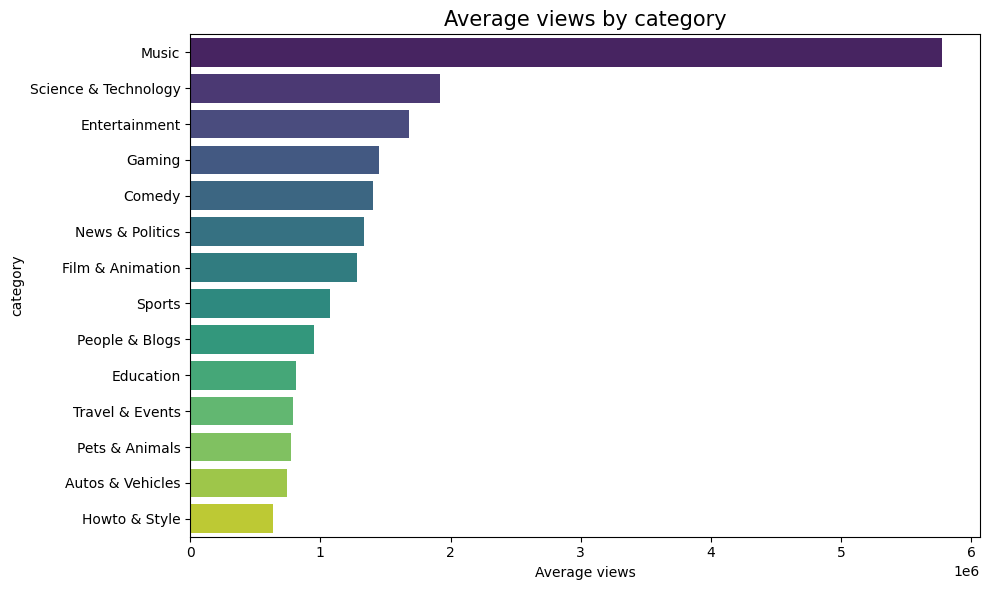

In [127]:
cat_views = df.groupby('category')['view_count'].mean().sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=cat_views.values, y=cat_views.index, palette='viridis')
plt.title('Average views by category', fontsize=15)
plt.xlabel('Average views')
plt.ylabel('category')
plt.tight_layout()
plt.show()

# 상관관계 분석 (조회수, 좋아요, 댓글)

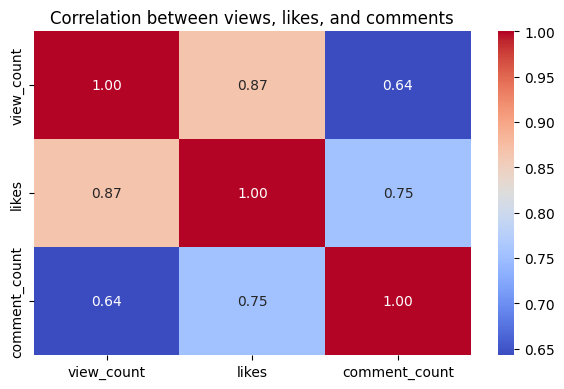

In [128]:
correlation_data = df[['view_count', 'likes', 'comment_count']].dropna()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between views, likes, and comments")
plt.tight_layout()
plt.show()

# 좋아요 비율 분석

<ipython-input-129-a34b9a316657>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=like_ratio_per_category.values, y=like_ratio_per_category.index, palette='mako')
/usr/local/lib/python3.11/dist-packages/matplotlib/transforms.py:351: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


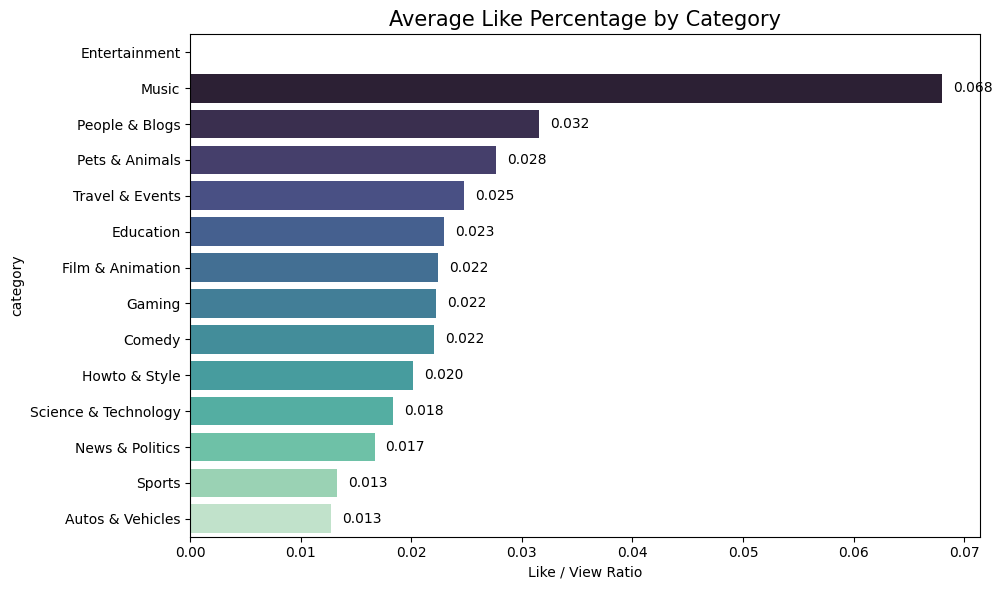

In [129]:
df['like_ratio'] = df['likes'] / df['view_count']
like_ratio_per_category = df.groupby('category')['like_ratio'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=like_ratio_per_category.values, y=like_ratio_per_category.index, palette='mako')
plt.title('Average Like Percentage by Category', fontsize=15)
plt.xlabel('Like / View Ratio')
plt.ylabel('category')
plt.tight_layout()
for i, v in enumerate(like_ratio_per_category.values):
    ax.text(v + 0.001, i, f"{v:.3f}", color='black', va='center')
plt.show()

# + view_count, like_ratio 기준 상위 카테고리 추출 (표로 보기 좋게 정리)

In [130]:
top_views = df.groupby('category')['view_count'].mean().sort_values(ascending=False).head(5).reset_index()
top_views.columns = ['카테고리', '평균 조회수']

top_like_ratio = df.groupby('category')['like_ratio'].mean().sort_values(ascending=False).head(5).reset_index()
top_like_ratio.columns = ['카테고리', '평균 좋아요 비율']

print("평균 조회수 상위 카테고리")
display(top_views)

print("좋아요 비율 상위 카테고리")
display(top_like_ratio)

평균 조회수 상위 카테고리


,카테고리,평균 조회수
0,Music,5.776829e+06
1,Science & Technology,1.917065e+06
2,Entertainment,1.682948e+06
3,Gaming,1.449822e+06
4,Comedy,1.402492e+06


좋아요 비율 상위 카테고리


,카테고리,평균 좋아요 비율
0,Entertainment,inf
1,Music,0.068029
2,People & Blogs,0.031511
3,Pets & Animals,0.027658
4,Travel & Events,0.024793


# + 제목 키워드 분석: 카테고리별로 나눠서 상위 단어 보기

In [131]:
# 분석 대상 카테고리 지정
target_categories = ['Music', 'Gaming', 'Entertainment']
stopwords_kr = set(['영상', '오늘', '있다', '나', '너', '우리', '소개', '리뷰', '보기', '쇼츠'])

# 카테고리별 단어 카운트 딕셔너리
category_keywords = {}

for cat in target_categories:
    titles = " ".join(df[df['category'] == cat]['title'].dropna())
    tokens = re.findall(r"[가-힣a-zA-Z]+", titles.lower())
    filtered = [t for t in tokens if t not in STOPWORDS and t not in stopwords_kr and len(t) > 1]
    category_keywords[cat] = Counter(filtered).most_common(10)

# 출력
for cat, words in category_keywords.items():
    print(f"\n 카테고리: {cat}")
    for word, freq in words:
        print(f" - {word}: {freq}회")


 카테고리: Music
 - mv: 5836회
 - official: 3023회
 - ep: 2432회
 - bts: 2122회
 - video: 2072회
 - feat: 1885회
 - teaser: 1630회
 - nct: 1504회
 - 방송: 1472회
 - music: 1444회

 카테고리: Gaming
 - vs: 982회
 - ep: 752회
 - brawl: 419회
 - 게임: 404회
 - 방송: 372회
 - 하이라이트: 365회
 - 만들기: 292회
 - 원신: 290회
 - 레전드: 262회
 - mnet: 260회

 카테고리: Entertainment
 - ep: 15645회
 - 방송: 11559회
 - sub: 6324회
 - eng: 5452회
 - kbs: 3264회
 - mbc: 3206회
 - feat: 3196회
 - vs: 3037회
 - en: 2588회
 - 하이라이트: 2544회


# + 워드클라우드 함수화 → 재사용 가능

In [132]:
def make_wordcloud_from_titles(dataframe, column='title', title='워드클라우드'):
    """
    특정 DataFrame에서 제목 텍스트 기반으로 워드클라우드를 생성해주는 함수
    - dataframe: 사용할 데이터프레임
    - column: 텍스트로 사용할 열 이름
    - title: 시각화 제목
    """
    text = " ".join(dataframe[column].dropna())
    tokens = re.findall(r"[가-힣a-zA-Z]+", text.lower())
    filtered = [t for t in tokens if t not in STOPWORDS and t not in stopwords_kr and len(t) > 1]
    wc = WordCloud(width=800, height=400, background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(" ".join(filtered))

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# 업로드 시간대 분석

<ipython-input-133-28c300e0efa5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='upload_hour', data=df, palette='crest')


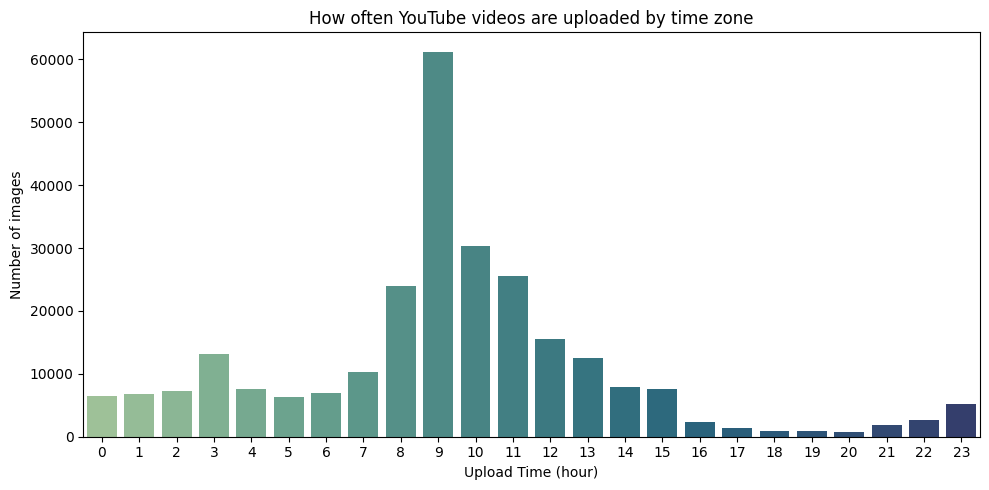

In [133]:
df['upload_hour'] = df['publishedat'].dt.hour
plt.figure(figsize=(10, 5))
sns.countplot(x='upload_hour', data=df, palette='crest')
plt.title("How often YouTube videos are uploaded by time zone")
plt.xlabel("Upload Time (hour)")
plt.ylabel("Number of images")
plt.tight_layout()
plt.show()

# 조회수 분포 (로그 스케일)

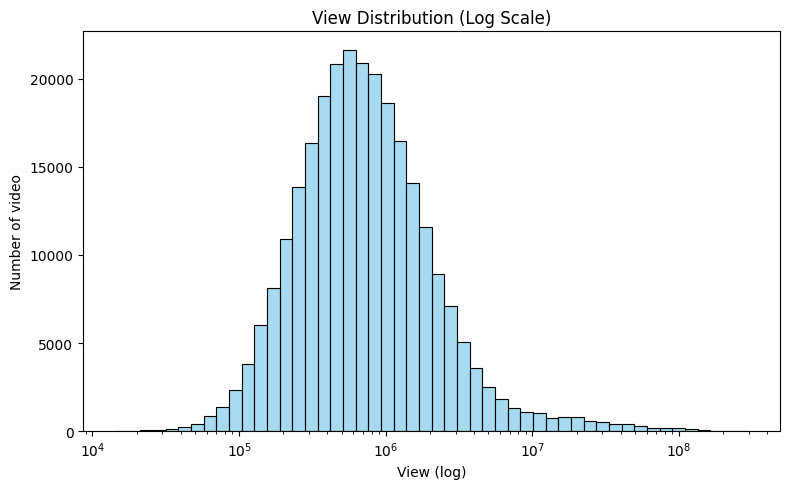

In [134]:
plt.figure(figsize=(8, 5))
sns.histplot(df['view_count'], bins=50, log_scale=True, color='skyblue')
plt.title("View Distribution (Log Scale)")
plt.xlabel("View (log)")
plt.ylabel("Number of video")
plt.tight_layout()
plt.show()

# 제목 키워드 빈도 분석 (상위 20개)

<ipython-input-135-4875432e1d5e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='ch:s=.25,rot=-.25')
<ipython-input-135-4875432e1d5e>:12: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-135-4875432e1d5e>:12: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-135-4875432e1d5e>:12: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-135-4875432e1d5e>:12: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-135-4875432e1d5e>:12: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  plt.tight

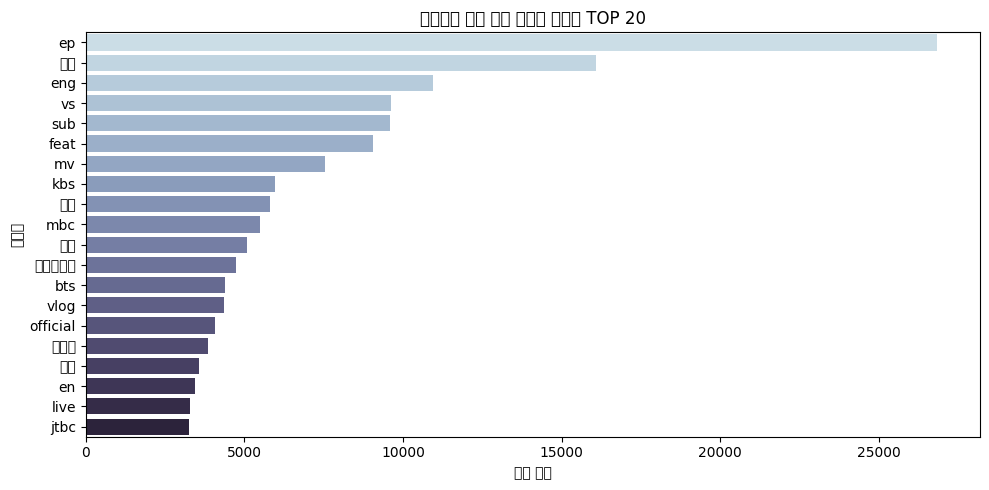

In [135]:
titles = " ".join(df['title'].dropna())
tokens = re.findall(r"[가-힣a-zA-Z]+", titles.lower())
stopwords_kr = set(['영상', '오늘', '있다', '나', '너', '우리', '소개', '리뷰', '보기', '쇼츠'])
filtered_tokens = [t for t in tokens if t not in STOPWORDS and t not in stopwords_kr and len(t) > 1]
top_words = Counter(filtered_tokens).most_common(20)
words, freqs = zip(*top_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(freqs), y=list(words), palette='ch:s=.25,rot=-.25')
plt.title("제목에서 가장 많이 사용된 키워드 TOP 20")
plt.xlabel("등장 빈도")
plt.ylabel("키워드")
plt.tight_layout()
plt.show()

# 좋아요 수 vs 댓글 수 관계

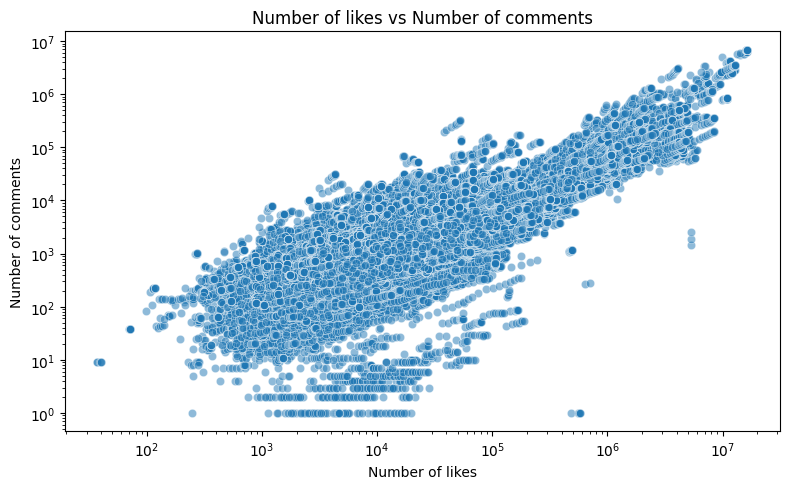

In [136]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='likes', y='comment_count', data=df, alpha=0.5)
plt.title("Number of likes vs Number of comments")
plt.xlabel("Number of likes")
plt.ylabel("Number of comments")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

# 영상별 조회수 시계열 시각화

In [137]:
# 문자열 상태로 포맷 지정하여 변환
df['trending_date'] = pd.to_datetime(
    df['trending_date'],
    format='%Y-%m-%dT%H:%M:%SZ',
    errors='coerce'
)

# 결과 확인
print(df['trending_date'].head())
print("NaT 남은 개수:", df['trending_date'].isna().sum())

0   2020-08-12
1   2020-08-12
2   2020-08-12
3   2020-08-12
4   2020-08-12
Name: trending_date, dtype: datetime64[ns]
NaT 남은 개수: 0


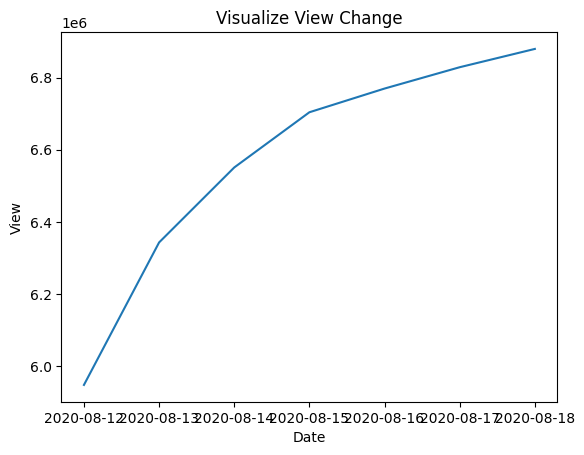

In [138]:
sample = df[df['video_id'] == 'uq5LClQN3cE'].sort_values('trending_date')
plt.plot(sample['trending_date'], sample['view_count'])
plt.title("Visualize View Change")
plt.xlabel("Date")
plt.ylabel("View")
plt.show()

# 영상별 시계열 길이 분포 확인

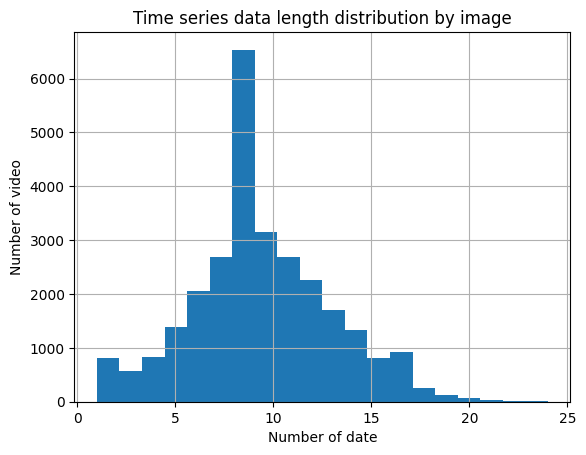

In [139]:
video_lengths = df.groupby('video_id').size()
video_lengths.hist(bins=20)
plt.title("Time series data length distribution by image")
plt.xlabel("Number of date")
plt.ylabel("Number of video")
plt.show()